In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

## Deja vu

Deja vu. It literally translates as 'already seen'. That feeling of having been there before. Done it before.

It's a feeling you might get in portions of this lesson. That's because time is something we've dealt with before. Many of the data sources we've covered in the course have some element of time involved, and we've even approached ways to deal with it so far. So, before we get too involved in all of these specialized techniques and concepts, let's take some time to review what we've already covered and how we can use it in terms of time.

## Plotting time

Now, we've spent a lot of time plotting variables so far in this course, and those techniques of course still have validity in a time dependent context.

You can still make a scatter plot.

You can still make a bar plot.

You can still do _almost everything_ we've done before.

It is worth noting, however, that some plots are better at presenting a relationship with time than others. Time is a relationship. It implies that one point, one observation is related to another in a typically linear, directed sense. We want our plots to reflect that relationship.

Let's take this basic dataset below as an example, about how much you've learned over time, say, when you were taking a course...

In [2]:
# Create a data frame.
learning_progress = pd.DataFrame()

In [3]:
# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

In [5]:
# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

Now, we've seen data like this before. And we have many ways we could plot it, each one reflecting its own relationships or lack thereof. Let's look at some below. 

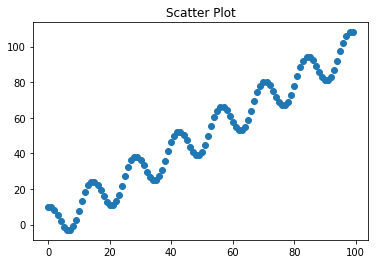

In [10]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.title('Scatter Plot');

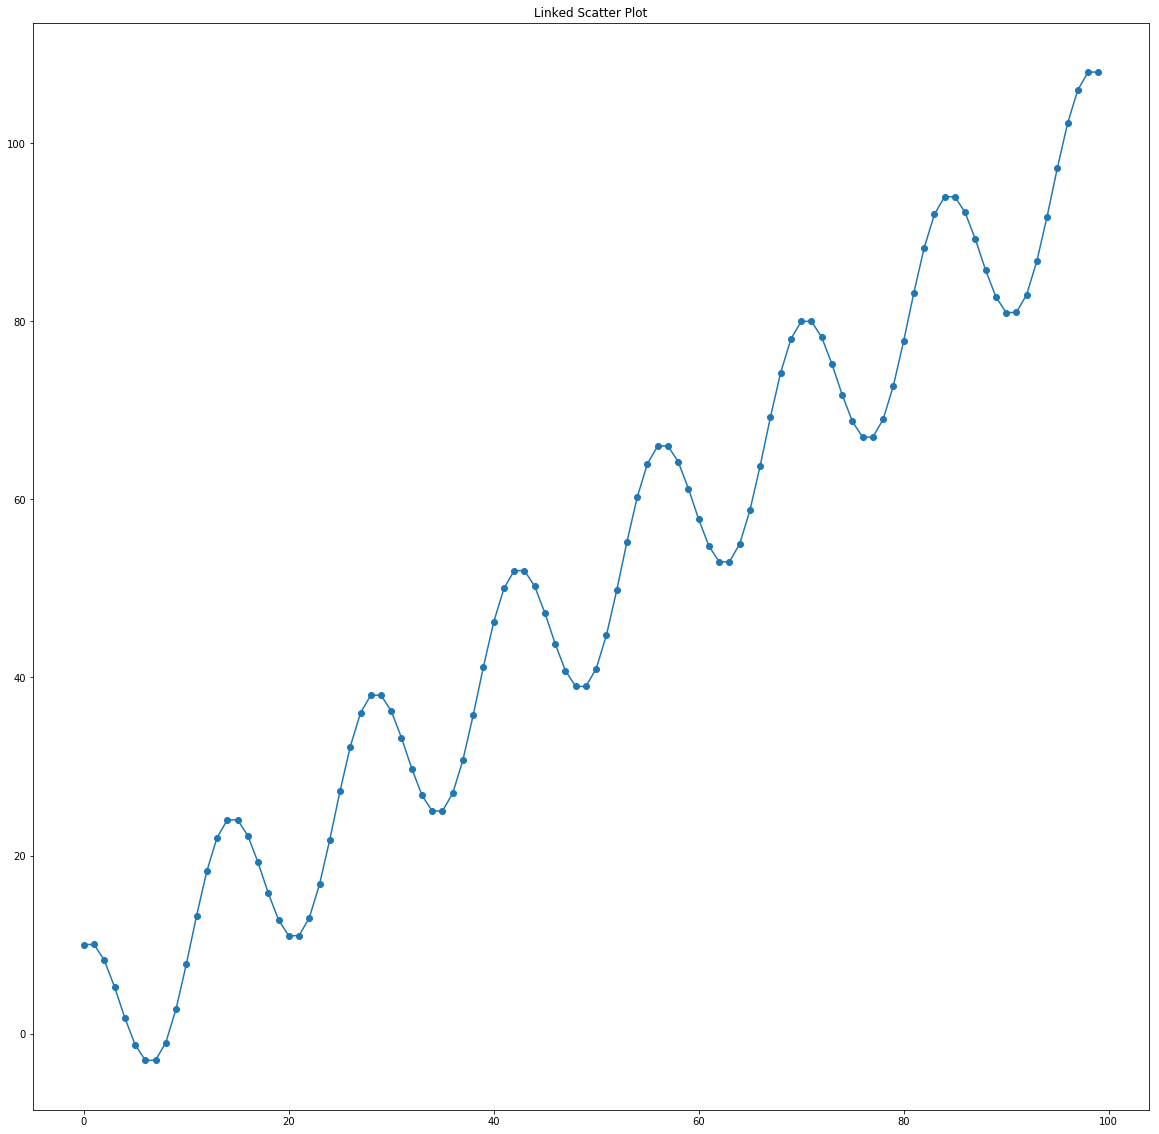

In [71]:
plt.figure(figsize=(20,20))
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.plot(learning_progress.knowledge, learning_progress.confidence)
plt.xticks=np.arange(0,99)
plt.title('Linked Scatter Plot');

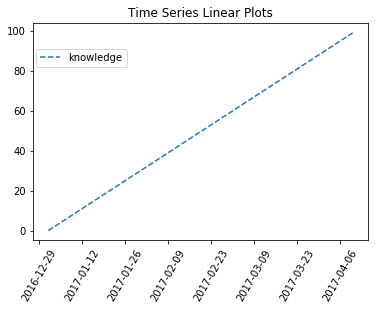

In [14]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--')
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

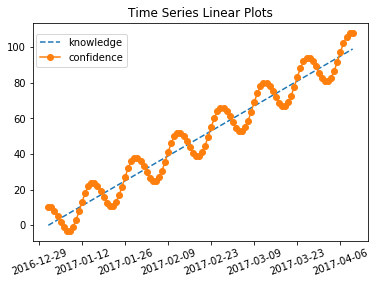

In [26]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--')
plt.plot(learning_progress.date, learning_progress.confidence, 'o-')
plt.xticks(rotation=20)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

As you can see, there are a lot of plots you can make with this data (and you could make many more), but not all plots are created equal.

Take that first scatter plot. It seems to have a trend, but it doesn't imply any relationship between the points themselves. You don't know how one is related to the one next to it except by suspicion. 

The second plot has a bit more information. It's still a scatter, but by connecting the dots (actually by overlaying a line) we imply a progression from point to point. One goes to the other goes to the next. This gives us a little more information that the previous plot was able to convey.

The third plot has a time based axis. This is nice because it gives us a real sense of the scale of time. However, we lose some of the scatter like relationship between the two points, instead showing their equivalence by having them marked at the same date along the timeline.

None of these plots are "right" or "wrong" per se. They're just all different. When you deal with data like this you have to decide what you want to show and how to best tell your story, while noting that the inclusion of time does effect those processes.

## Things get messy

One of the most common complaints about Python, at least from an analytics perspective, is time; specifically how Python handles time as a data type. Really, the issue stems from the fact that there *isn't* one single date type in Python. There are several. For the most part you'll want to rely on the date and time tools Pandas gives you. However in the wild you'll run into timestamps. Or timedeltas. Or [Unix epoch time](https://en.wikipedia.org/wiki/Unix_time). Your time data may be "naive" or "aware". From [the Python docs](https://docs.python.org/3/library/datetime.html):

>An aware object has sufficient knowledge of applicable algorithmic and political time adjustments, such as time zone and daylight saving time information, to locate itself relative to other aware objects. An aware object is used to represent a specific moment in time that is not open to interpretation.
>
>A naive object does not contain enough information to unambiguously locate itself relative to other date/time objects. Whether a naive object represents Coordinated Universal Time (UTC), local time, or time in some other timezone is purely up to the program, just like it is up to the program whether a particular number represents metres, miles, or mass. Naive objects are easy to understand and to work with, at the cost of ignoring some aspects of reality.

On top of the complexity of your underlying _data_, layer on the panalopy of _formatting options_ for displaying the time with or without timezones.

In general we'll try to stick with pandas' ways of handling time, and you have the `pd.to_datetime()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to get you out of a jam when you find yourself dealing with something else that isn't quite behaving in the way you want. We won't dive into timezones deeply here, but if you work with time much there's plenty of rabbit hole for you to go down.

![image](https://imgs.xkcd.com/comics/supervillain_plan.png)

## Concerns of time

Time is not a variable like every other. It has specific concerns. Before we talk about how to model those concerns, we should identify what they are. This will directly affect how we model them.

**Trends** are probably the most common concern with time. Things change over time, and a trend is a way to quantify how that change is occurring. Sometimes that trend will be linear, other times it may have a different functional form. The key is the data is moving in a direction as time passes, and understanding the direction and speed of that change can fundamentally affect a business.

**Seasonality** is another concept we've encountered before. This is the idea that there is a repeating pattern over some period of time. Ice cream sales are higher in summer than in winter. Retail sales might be stronger on the weekends, or people might tend to miss morning appointments. Seasonality concerns arise whenever you have a repeating pattern over a set, consistent period of time, whether that time period is a season, a week a day, an hour.

**Events** are the final type of concern we'll talk about. Events are a moment in time where everything changes. It can be a phase shift, a shock, or a total change of directions. What it means practically is that what comes before is not the same as what comes after. How that change manifests depends on the data, but the inclusion of time allows us to find events and adjust accordingly.

## DRILL: What's the seasons?

Look at the data we created in the beginning. Analyze it to figure out how big a cycle is. Use your programming skills to derive the cycle time rather than looking at the code used to create the series.


In [78]:
def find_season(a,b,range):

    counter= 0
    switch = True

    for i in r:  
        if switch == True:
            if a[i]<b[i]:
                switch = False
        else:
            if a[i]>b[i]:
                counter+=1
                switch = True

    return r[-1]/counter   

In [79]:
r = range(0,100)
k,c = learning_progress.knowledge.values.tolist(), learning_progress.confidence.values.tolist()
find_season(k,c,r)

14.142857142857142